In [1]:
import pandas as pd

In [2]:
dataset = pd.read_excel('Matriculas_Colegios_Antioquia_2016_Depurado.xlsx', engine='openpyxl')
dataset

,Matricula Primera Infancia,Matricula Transición,Matricula Primaria,Matricula Secundaria,Matricula Media Total,Matricula CLEIS,Matricula Total,Tasa de Aprobacion 2016,Tasa de Reprobacion 2016,Tasa de Desercion 2016
0,0.0,51.0,289.0,267.0,103.0,278.0,988.0,0.953,0.012,0.035
1,0.0,95.0,543.0,576.0,231.0,0.0,1445.0,0.982,0.009,0.010
2,0.0,13.0,52.0,25.0,2.0,0.0,92.0,0.759,0.190,0.052
3,0.0,7.0,62.0,19.0,2.0,0.0,90.0,0.877,0.062,0.062
4,0.0,144.0,911.0,0.0,0.0,0.0,1055.0,0.944,0.039,0.017
...,...,...,...,...,...,...,...,...,...,...
4636,0.0,0.0,9.0,0.0,0.0,0.0,9.0,1.000,0.000,0.000
4637,0.0,2.0,21.0,0.0,0.0,0.0,23.0,1.000,0.000,0.000
4638,0.0,2.0,19.0,0.0,0.0,0.0,21.0,0.923,0.000,0.077
4639,0.0,0.0,15.0,0.0,0.0,0.0,15.0,0.889,0.000,0.111


In [3]:
dataset = dataset.fillna(0)

In [4]:
from sklearn.cluster import KMeans
kmeans_instances = [KMeans(n_clusters=i).fit(dataset) for i in range(1,11)]

Elbow method

In [5]:
import numpy as np
from scipy.spatial.distance import cdist

X = dataset
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

for i in range(1,11):

  distortions.append(sum(np.min(cdist(X, kmeans_instances[i-1].cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
  inertias.append(kmeans_instances[i-1].inertia_)
 
  mapping1[i-1] = sum(np.min(cdist(X, kmeans_instances[i-1].cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
  mapping2[i-1] = kmeans_instances[i-1].inertia_

In [6]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

0 : 175.70930519910976
1 : 101.84057105421105
2 : 73.62267483568932
3 : 64.84945890272883
4 : 61.16244201692192
5 : 58.11918006094728
6 : 55.36095442412979
7 : 52.30104453086725
8 : 51.350195298490505
9 : 48.64593786712691


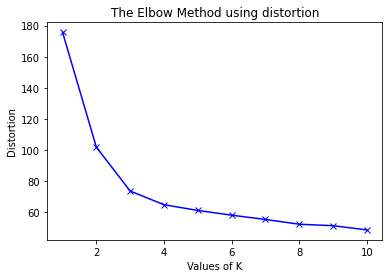

In [7]:
from matplotlib import pyplot as plt

plt.plot(range(1,11), distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using distortion')
plt.savefig("kmeans_matriculas_distortion.png", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_matriculas_distortion.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_enrollment_distortion.svg", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [8]:
for key, val in mapping2.items():
	print(f'{key} : {val}')

0 : 478204140.5764739
1 : 169462272.7432738
2 : 107714303.40699384
3 : 83639651.84005532
4 : 70441713.66943055
5 : 60114857.19949859
6 : 53290597.704474546
7 : 47283987.291454695
8 : 41898756.705914855
9 : 36771639.96019452


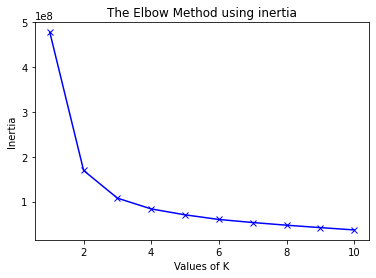

In [9]:
plt.plot(range(1,11), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using inertia')
plt.savefig("kmeans_matriculas_inertia.png", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_matriculas_inertia.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_enrollment_inertia.svg", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()


Davies Bouldin score

In [10]:
from sklearn.metrics import davies_bouldin_score

davies_scores = []
for key, kmeans_instance in enumerate(kmeans_instances):
  if key >= 2: 
    davies_scores.append(davies_bouldin_score(X, kmeans_instance.labels_))
    print(key,':',davies_scores[-1])

2 : 0.7367433835025671
3 : 0.8880374926629596
4 : 0.9442686500156869
5 : 0.8944258458381431
6 : 0.8287307508552167
7 : 0.9042274057415524
8 : 0.8304269417619935
9 : 0.7923695865086051


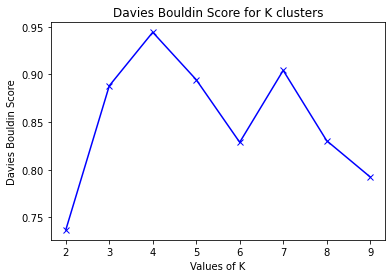

In [11]:
plt.plot(range(2,10), np.array(davies_scores), 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Davies Bouldin Score')
plt.title('Davies Bouldin Score for K clusters')
plt.savefig("kmeans_matriculas_davies_bouldin.png", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_matriculas_davies_bouldin.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_enrollment_davies_bouldin.svg", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

Calinski Harabasz score

In [12]:
from sklearn.metrics import calinski_harabasz_score

calinski_scores = []
for key, kmeans_instance in enumerate(kmeans_instances):
    if key >= 2: 
        calinski_scores.append(calinski_harabasz_score(X, kmeans_instance.labels_))
        print(key,':',calinski_scores[-1])

2 : 7976.356502836861
3 : 7291.58915561555
4 : 6709.045367678833
5 : 6447.146189826785
6 : 6158.21377655975
7 : 6031.800569076063
8 : 6029.342364425601
9 : 6177.094674805334


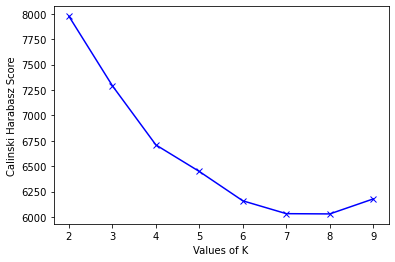

In [13]:
plt.plot(range(2,10), calinski_scores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Calinski Harabasz Score')
plt.savefig("kmeans_matriculas_calinski_harabasz.png", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_matriculas_calinski_harabasz.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_enrollment_calinski_harabasz.svg", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

Silhouette score

In [14]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for key, kmeans_instance in enumerate(kmeans_instances):
    if key >= 2: 
        silhouette_scores.append(silhouette_score(X, kmeans_instance.labels_, metric='euclidean'))
        print(key,':',silhouette_scores[-1])

2 : 0.816931674901893
3 : 0.7950304880265217
4 : 0.7867803939817218
5 : 0.7821021658569396
6 : 0.7796664394610278
7 : 0.749786903775965
8 : 0.746630744950079
9 : 0.7542818580824612


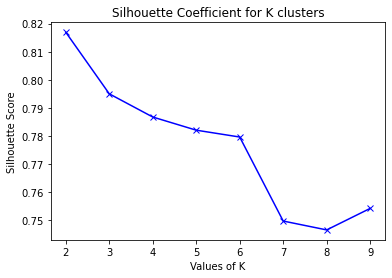

In [15]:
plt.plot(range(2,10), silhouette_scores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Coefficient for K clusters')
plt.savefig("kmeans_matriculas_silhouette.png", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_matriculas_silhouette.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_enrollment_silhouette.svg", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()